In [6]:
from mcbj import *
from tqdm.notebook import tqdm
import filter_traces
import plots
import re
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm, colormaps, cycler, rcParams, gridspec, ticker
import utils

date = "22_02_03"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f"//DATACENTER/BreakJunction_group/BJ_Data/{date}")

In [2]:
rcParams['figure.constrained_layout.use'] = False
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'stix'
rcParams['mathtext.rm'] = 'serif'
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.labelsize'] = 4
rcParams['ytick.labelsize'] = 4
rcParams['xtick.major.pad'] = 2
rcParams['xtick.minor.pad'] = 0.8
rcParams['ytick.major.pad'] = 1
rcParams['ytick.minor.pad'] = 0.8
rcParams['axes.labelsize'] = 4
rcParams['axes.titlepad'] = 3.0
rcParams['axes.labelpad'] = 1.0
rcParams['agg.path.chunksize'] = 10000

In [3]:
home_folder.joinpath('results/IVs/selected')

WindowsPath('//DATACENTER/BreakJunction_group/BJ_Data/22_02_03/results/IVs/selected')

In [12]:
tunnel_pull_fits = pd.read_excel(io=home_folder.joinpath('results/IVs/selected/Tunnel_22_02_03_pull_fits_all.xlsx'))
tunnel_pull_fits['IV part'] = list(map(lambda x: int(re.search(r'(\d)_IV', x).group(1)), tunnel_pull_fits['Fit Trace']))

In [15]:
tunnel_pull_fits['R_meas1 [Ohm]'] = utils.convert_g0_to_ohm(tunnel_pull_fits['G_meas1 [G0]'])
tunnel_pull_fits['R_meas2 [Ohm]'] = utils.convert_g0_to_ohm(tunnel_pull_fits['G_meas2 [G0]'])
tunnel_pull_fits['R_meas_mean [Ohm]'] = tunnel_pull_fits[['R_meas1 [Ohm]', 'R_meas2 [Ohm]']].mean(axis=1)

In [20]:
np.unique(abs(tunnel_pull_fits['R_meas_mean [Ohm]'] - tunnel_pull_fits['R [Ohm]'])/tunnel_pull_fits['R [Ohm]'] < 0.2, return_counts=True)

(array([False,  True]), array([4215, 5841], dtype=int64))

In [408]:
tunnel_pull_fits.sort_values(['Trace', 'IV part'])

,Trace,Fit Trace,R [Ohm],z -Gap [nm],Phi - Barrier [eV],dR/dz,dR/dPhi,G_meas1 [G0],dG/G_meas1,G_meas2 [G0],dG/G_meas2,IV part,R_meas1 [Ohm],R_meas2 [Ohm],R_meas_mean [Ohm]
0,19522,'1_IV_trace_19522_pull_pl',13069957.0,0.32,0.77,1.563003e+17,1.099730e+26,0.002974,0.085796,0.001155,0.143681,1,4337060.0,11165012.0,7751036.0
639,19522,'2_IV_trace_19522_pull_pl',12976073.0,0.33,0.68,1.483611e+17,1.122828e+26,0.002974,0.085796,0.001155,0.143681,2,4337060.0,11165012.0,7751036.0
1278,19522,'3_IV_trace_19522_pull_pl',17213803.0,0.27,1.76,2.784074e+17,8.233249e+25,0.002974,0.085796,0.001155,0.143681,3,4337060.0,11165012.0,7751036.0
1917,19522,'4_IV_trace_19522_pull_pl',20498335.0,0.36,0.76,2.371568e+17,1.994190e+26,0.002974,0.085796,0.001155,0.143681,4,4337060.0,11165012.0,7751036.0
1,19811,'1_IV_trace_19811_pull_pl',3730296.1,0.21,0.92,5.156197e+16,1.692375e+25,0.005064,0.107289,0.002731,0.043851,1,2547254.5,4722916.5,3635085.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,48909,'4_IV_trace_48909_pull_pl',63364976.0,0.34,1.96,1.033247e+18,3.765722e+26,0.000408,0.037719,0.000161,0.050349,4,31586484.0,80331764.0,55959124.0
4430,49042,'1_IV_trace_49042_pull_pl',16774953.0,0.33,0.87,2.068231e+17,1.323794e+26,0.001002,0.032493,0.000760,0.021734,1,12877291.0,16968166.0,14922728.5
6305,49042,'2_IV_trace_49042_pull_pl',15951589.0,0.32,0.93,2.029315e+17,1.186968e+26,0.001002,0.032493,0.000760,0.021734,2,12877291.0,16968166.0,14922728.5
8180,49042,'3_IV_trace_49042_pull_pl',18777990.0,0.32,1.07,2.507298e+17,1.328797e+26,0.001002,0.032493,0.000760,0.021734,3,12877291.0,16968166.0,14922728.5


In [463]:
(tunnel_pull_fits.sort_values(['Trace', 'IV part'])[tunnel_pull_fits.sort_values(['Trace', 'IV part'])['Phi - Barrier [eV]'] < 2].groupby('Trace').count()['Fit Trace'] == 4).index


Int64Index([19522, 19811, 19877, 19905, 19998, 20011, 20065, 20092, 20202,
            20215,
            ...
            48283, 48310, 48396, 48398, 48428, 48454, 48668, 48837, 48909,
            49042],
           dtype='int64', name='Trace', length=2508)

In [436]:
tunnel_pull_fits.sort_values(['Trace', 'IV part'])['Trace'][0] in np.array((tunnel_pull_fits.sort_values(['Trace', 'IV part'])[tunnel_pull_fits.sort_values(['Trace', 'IV part'])['Phi - Barrier [eV]'] < 2].groupby('Trace').count()['Fit Trace'] == 4).index)

True

In [473]:
res_df = tunnel_pull_fits.pivot(index='Trace', columns='IV part', values='R [Ohm]')
gap_df = tunnel_pull_fits.pivot(index='Trace', columns='IV part', values='z -Gap [nm]')
barrier_df = tunnel_pull_fits.pivot(index='Trace', columns='IV part', values='Phi - Barrier [eV]')

barrier_df_filt = barrier_df[(barrier_df < 2).all(axis=1)]

In [486]:
# barrier_df

In [479]:
tunnel_pull_fits['Condition'] = np.zeros(tunnel_pull_fits.shape[0])
for i in range(len(tunnel_pull_fits['Condition'])):
    tunnel_pull_fits['Condition'][i] = tunnel_pull_fits.sort_values(['Trace', 'IV part'])['Trace'][i] in barrier_df_filt.index

C:\Users\Admin\AppData\Local\Temp\ipykernel_6088\1264015991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tunnel_pull_fits['Condition'][i] = tunnel_pull_fits.sort_values(['Trace', 'IV part'])['Trace'][i] in barrier_df_filt.index
D:\mcbj_stmbj\venv\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [484]:
tunnel_pull_fits[tunnel_pull_fits['Condition']].sort_values(['Trace', 'IV part'])

,Trace,Fit Trace,R [Ohm],z -Gap [nm],Phi - Barrier [eV],dR/dz,dR/dPhi,G_meas1 [G0],dG/G_meas1,G_meas2 [G0],dG/G_meas2,IV part,R_meas1 [Ohm],R_meas2 [Ohm],R_meas_mean [Ohm],Condition
0,19522,'1_IV_trace_19522_pull_pl',13069957.0,0.32,0.77,1.563003e+17,1.099730e+26,0.002974,0.085796,0.001155,0.143681,1,4337060.0,1.116501e+07,7751036.0,True
639,19522,'2_IV_trace_19522_pull_pl',12976073.0,0.33,0.68,1.483611e+17,1.122828e+26,0.002974,0.085796,0.001155,0.143681,2,4337060.0,1.116501e+07,7751036.0,True
1278,19522,'3_IV_trace_19522_pull_pl',17213803.0,0.27,1.76,2.784074e+17,8.233249e+25,0.002974,0.085796,0.001155,0.143681,3,4337060.0,1.116501e+07,7751036.0,True
1917,19522,'4_IV_trace_19522_pull_pl',20498335.0,0.36,0.76,2.371568e+17,1.994190e+26,0.002974,0.085796,0.001155,0.143681,4,4337060.0,1.116501e+07,7751036.0,True
1,19811,'1_IV_trace_19811_pull_pl',3730296.1,0.21,0.92,5.156197e+16,1.692375e+25,0.005064,0.107289,0.002731,0.043851,1,2547254.5,4.722917e+06,3635085.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050,48454,'4_IV_trace_48454_pull_pl',89495813.0,0.46,0.95,1.058251e+18,1.016501e+27,0.000358,0.075724,0.000124,0.081056,4,36065152.0,1.036464e+08,69855778.0,True
4430,49042,'1_IV_trace_49042_pull_pl',16774953.0,0.33,0.87,2.068231e+17,1.323794e+26,0.001002,0.032493,0.000760,0.021734,1,12877291.0,1.696817e+07,14922728.5,True
6305,49042,'2_IV_trace_49042_pull_pl',15951589.0,0.32,0.93,2.029315e+17,1.186968e+26,0.001002,0.032493,0.000760,0.021734,2,12877291.0,1.696817e+07,14922728.5,True
8180,49042,'3_IV_trace_49042_pull_pl',18777990.0,0.32,1.07,2.507298e+17,1.328797e+26,0.001002,0.032493,0.000760,0.021734,3,12877291.0,1.696817e+07,14922728.5,True


In [346]:
tunnel_pull_fits.columns

Index(['Trace', 'Fit Trace', 'R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]',
       'dR/dz', 'dR/dPhi', 'G_meas1 [G0]', 'dG/G_meas1', 'G_meas2 [G0]',
       'dG/G_meas2', 'IV part', 'R_meas1 [Ohm]', 'R_meas2 [Ohm]',
       'R_meas_mean [Ohm]'],
      dtype='object')

In [366]:
print(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace][['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']].mean())
tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace][['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']]
which_trace = tunnel_pull_fits['Trace'].unique()[1]
tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace][['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']].apply(lambda x: abs(np.mean(x)-x)/np.mean(x))


R [Ohm]               1.593954e+07
z -Gap [nm]           3.200000e-01
Phi - Barrier [eV]    9.925000e-01
dtype: float64


,R [Ohm],z -Gap [nm],Phi - Barrier [eV]
1,0.075962,1.321694e-16,0.108959
640,0.129081,1.321694e-16,0.186441
1279,0.117384,4.761905e-02,0.041162
1918,0.087659,4.761905e-02,0.336562


In [493]:
tunnel_pull_fits = tunnel_pull_fits[tunnel_pull_fits['Condition']]

In [494]:
mean_differences_df = tunnel_pull_fits.sort_values(['Trace', 'IV part']).groupby(['Trace'])[['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']].apply(lambda x: abs(np.mean(x)-x)/np.mean(x))

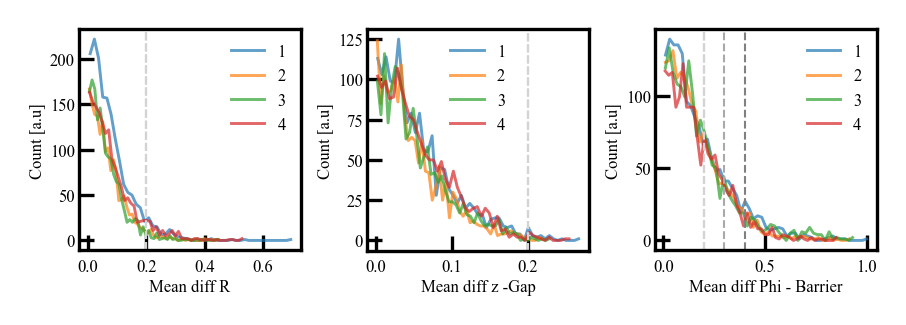

In [534]:
dpi=300
fig = plt.figure(figsize=utils.cm2inch(9, 3), dpi=dpi)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=3,
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0.3, hspace=0)

hue = 'IV part'
bins_dict = {}
hist_1d_dict = {}
axs=[]

data = mean_differences_df.join(tunnel_pull_fits.sort_values(['Trace', 'IV part'])['IV part'], how='left')

for ind, val in enumerate(mean_differences_df.columns):
    axs.append(fig.add_subplot(gs[ind]))
    for i in range(1, 5):
        bins, hist_1d = utils.calc_hist_1d_single(data=data[data[hue] == i][val],
                                                  xrange=(min(data[data[hue] == i][val]), max(data[data[hue] == i][val])),
                                                  xbins_num = 50, log_scale = False, bin_mode='decade')
        
        bins_dict[val] = bins
        hist_1d_dict[val] = hist_1d
        
        axs[ind].set_box_aspect(1)
        axs[ind].plot(bins_dict[val], hist_1d_dict[val], label=f'{i}', alpha=0.7, lw=0.7)
        axs[ind].legend(fontsize=4, frameon=False)
        axis_label = re.search(r'([^\[^\]]*)', val).group(1).strip()
        axs[ind].set_xlabel(f'Mean diff {axis_label}')
        axs[ind].set_ylabel('Count [a.u]')
        
        axs[ind].axvline(0.2, ls='--', c='lightgrey', lw=0.5)
axs[-1].axvline(0.3, ls='--', c='darkgrey', lw=0.5)
axs[-1].axvline(0.4, ls='--', c='grey', lw=0.5)

In [496]:
mean_diff_R = np.array([])
for which_trace in tunnel_pull_fits['Trace'].unique():
    temp_df = tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace][['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']].apply(lambda x: abs(np.mean(x)-x)/np.mean(x))
    mean_diff_R = np.append(mean_diff_R, temp_df['R [Ohm]'])

## Filter those where the values (Resistance, gap, barrier) in the 4 quarters do not differ more than 20% from each other AND the measured and simulated resistances also don't differ more than 20%

In [521]:
collected_traces = []

for which_trace in tunnel_pull_fits['Trace'].unique():
    # print(which_trace)
    R_mean = tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'].mean()
    gap_mean = tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['z -Gap [nm]'].mean()
    barrier_mean = tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['Phi - Barrier [eV]'].mean()

#     print(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'] - R_mean)/R_mean)
#     print(np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'] - R_mean)/R_mean < 0.2))

#     print(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['z -Gap [nm]'] - gap_mean)/gap_mean)
#     print(np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['z -Gap [nm]'] - gap_mean)/gap_mean < 0.2))

#     print(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['Phi - Barrier [eV]'] - barrier_mean)/barrier_mean)
#     print(np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['Phi - Barrier [eV]'] - barrier_mean)/barrier_mean < 0.2))

    if np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'] - R_mean)/R_mean < 0.2) and \
       np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['z -Gap [nm]'] - gap_mean)/gap_mean < 0.2) and\
       np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['Phi - Barrier [eV]'] - barrier_mean)/barrier_mean < 0.3) and \
       np.all(abs(np.log10(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R_meas_mean [Ohm]']) - 
                  np.log10(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'])) < np.log10(2)):
        collected_traces.append(which_trace)

In [536]:
len(collected_traces)

882

In [522]:
good_traces, count_traces = np.unique(collected_traces, return_counts=True)
# print(good_traces, count_traces)

In [523]:
good_traces.shape

(882,)

In [530]:
tunnel_pull_fits_filt = tunnel_pull_fits[np.array(list(map(lambda x: x in good_traces, tunnel_pull_fits['Trace'])))].sort_values(by=['Trace', 'IV part'])

In [532]:
tunnel_pull_fits_filt.columns

Index(['Trace', 'Fit Trace', 'R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]',
       'dR/dz', 'dR/dPhi', 'G_meas1 [G0]', 'dG/G_meas1', 'G_meas2 [G0]',
       'dG/G_meas2', 'IV part', 'R_meas1 [Ohm]', 'R_meas2 [Ohm]',
       'R_meas_mean [Ohm]', 'Condition'],
      dtype='object')

In [533]:
tunnel_pull_fits_filt.to_excel(excel_writer=home_folder.joinpath('results/IVs/selected/Tunnel_22_02_03_pull_fits_filtered.xlsx'), columns=['Trace', 'Fit Trace', 'R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]', 'dR/dz', 'dR/dPhi', 'G_meas1 [G0]', 'dG/G_meas1', 'G_meas2 [G0]', 'dG/G_meas2', 'R_meas1 [Ohm]', 'R_meas2 [Ohm]',
       'R_meas_mean [Ohm]'])

In [502]:
# which_trace = tunnel_pull_fits_filt['Trace'].unique()[0]

# print(tunnel_pull_fits_filt[tunnel_pull_fits_filt['Trace'] == which_trace]['R [Ohm]'].mean())
# print(tunnel_pull_fits_filt[tunnel_pull_fits_filt['Trace'] == which_trace]['z -Gap [nm]'].mean())
# print(tunnel_pull_fits_filt[tunnel_pull_fits_filt['Trace'] == which_trace]['Phi - Barrier [eV]'].mean())

In [503]:
# tunnel_pull_fits_filt.iloc[np.arange(0, tunnel_pull_fits_filt.shape[0], 4, dtype=int)]

In [504]:
tunnel_pull_fits_filt.groupby('Trace').mean()

,R [Ohm],z -Gap [nm],Phi - Barrier [eV],dR/dz,dR/dPhi,G_meas1 [G0],dG/G_meas1,G_meas2 [G0],dG/G_meas2,IV part,R_meas1 [Ohm],R_meas2 [Ohm],R_meas_mean [Ohm]
Trace,,,,,,,,,,,,,
20517,1.354964e+06,0.1475,0.6700,1.843468e+16,4.528422e+24,0.010731,0.031222,0.012714,0.019314,2.5,1.202143e+06,1.014645e+06,1.108394e+06
20518,9.615626e+05,0.1225,0.6650,1.342126e+16,2.604358e+24,0.014985,0.018039,0.017040,0.014219,2.5,8.608826e+05,7.570629e+05,8.089727e+05
20527,5.149306e+06,0.2375,0.8675,6.824072e+16,2.823753e+25,0.002435,0.027649,0.004244,0.019748,2.5,5.297717e+06,3.039647e+06,4.168682e+06
20530,2.869659e+06,0.2025,0.7075,3.729461e+16,1.383622e+25,0.004312,0.018344,0.004752,0.019287,2.5,2.991873e+06,2.714440e+06,2.853157e+06
20531,6.248108e+06,0.2575,0.7950,7.946101e+16,3.862504e+25,0.003212,0.036714,0.001928,0.029694,2.5,4.015945e+06,6.690608e+06,5.353276e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47230,4.666233e+07,0.3700,1.2725,6.390111e+17,3.653199e+26,0.000790,0.026943,0.000215,0.040199,2.5,1.632615e+07,6.001126e+07,3.816871e+07
47233,2.460734e+07,0.3725,0.7750,2.836915e+17,2.461089e+26,0.000696,0.030414,0.000416,0.046547,2.5,1.854021e+07,3.101034e+07,2.477528e+07
47313,2.158891e+07,0.3450,0.9300,2.679044e+17,1.814508e+26,0.001113,0.039496,0.000570,0.036876,2.5,1.158530e+07,2.261888e+07,1.710209e+07


In [505]:
# tunnel_pull_fits_filt[tunnel_pull_fits_filt['dR/dPhi'] == 0]

In [506]:
tunnel_pull_fits_filt.columns

Index(['Trace', 'Fit Trace', 'R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]',
       'dR/dz', 'dR/dPhi', 'G_meas1 [G0]', 'dG/G_meas1', 'G_meas2 [G0]',
       'dG/G_meas2', 'IV part', 'R_meas1 [Ohm]', 'R_meas2 [Ohm]',
       'R_meas_mean [Ohm]', 'Condition'],
      dtype='object')

In [507]:
def scatter_plot_matrix(data: pd.DataFrame, col_names: Tuple[str, ...], set_log: Tuple[bool, ...], set_limits: Tuple[Union[Tuple[float, float], None], ...] = None,
                        hue: Optional[str] = None, cmap = colormaps['Reds'], cmap_reversed=False, bins_num: Union[Tuple[int, ...], int] = 100,
                        figsize: Optional[Tuple[float, float]] = None, dpi: int = 300, min_plot_size=utils.cm2inch(8, 8), **scatter_kwargs):
        
    if hue is None:
        num_categories = 1
    else:
        num_categories = tunnel_pull_fits_filt[hue].nunique()
        categories = tunnel_pull_fits_filt[hue].unique()
        if cmap_reversed:
            my_cmap = cmap(np.linspace(0.25, 1, num_categories))[::-1]
        else:
            my_cmap = cmap(np.linspace(0.25, 1, num_categories))
        
    num_cols = len(col_names)
    
    if isinstance(bins_num, int):
        bins_num = (bins_num, )*num_cols
    
    # print(my_cmap)
    
    if len(set_log) != num_cols:
        raise ValueError('Not enough `set_log` parameters! Must be same length as `col_names`')
    
    if figsize is None:
        figsize = (1.1 * min_plot_size[0], min_plot_size[1])
    
    fig = plt.figure(figsize=figsize, dpi=dpi)  # figsize: (width, height) in inches
    gs = gridspec.GridSpec(nrows=num_cols, ncols=num_cols, width_ratios=num_cols*(1,), height_ratios=num_cols*(1,),
                           figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0.4, hspace=0.4)
    
    axs = []
    if num_categories == 1:
        for i, row in enumerate(col_names):
            for j, col in enumerate(col_names):
                axs.append(fig.add_subplot(gs[i, j]))
                axs[i*num_cols + j].set_xlabel(col_names[j])
                if i != j:
                    axs[i*num_cols + j].set_ylabel(col_names[i])
                    axs[i*num_cols + j].scatter(data[col_names[j]], data[col_names[i]], **scatter_kwargs)
                    if set_log[i]:
                        axs[i*num_cols + j].set_yscale('log')
                else:
                    axs[i*num_cols + j].set_ylabel('Counts [a.u.]')
                    bins, hist_1d = utils.calc_hist_1d_single(data=data[col_names[j]], xrange=(min(data[col_names[j]]), max(data[col_names[j]])),
                                                              xbins_num=bins_num[i], log_scale=set_log[j], bin_mode='total')

                    axs[i*num_cols + j].plot(bins, hist_1d, lw=1)

                if set_log[j]:
                    axs[i*num_cols + j].set_xscale('log')
    else:
        
        for i, row in enumerate(col_names):
            for j, col in enumerate(col_names):
                axs.append(fig.add_subplot(gs[i, j]))
                for k, cat in enumerate(categories):
                    axs[i*num_cols + j].set_xlabel(col_names[j])
                    if i != j:
                        axs[i*num_cols + j].set_ylabel(col_names[i])
                        axs[i*num_cols + j].scatter(data[data[hue]==cat][col_names[j]], data[data[hue]==cat][col_names[i]], color=my_cmap[k], **scatter_kwargs)
                        if set_log[i]:
                            axs[i*num_cols + j].set_yscale('log')
                    else:
                        axs[i*num_cols + j].set_ylabel('Counts [a.u.]')
                        bins, hist_1d = utils.calc_hist_1d_single(data=data[data[hue]==cat][col_names[j]], xrange=(min(data[data[hue]==cat][col_names[j]]), max(data[data[hue]==cat][col_names[j]])),
                                                                  xbins_num=bins_num[i], log_scale=set_log[j], bin_mode='total')
                        
                        axs[i*num_cols + j].plot(bins, hist_1d, lw=1, c=my_cmap[k], alpha=0.8, label=categories[k])
                        axs[i*num_cols + j].legend(fontsize=rcParams['xtick.labelsize'], frameon=False, handlelength=rcParams['xtick.labelsize']/4)

                    if set_log[j]:
                        axs[i*num_cols + j].set_xscale('log')
                        
    return axs

# ********************************************************************************************

def hist_2d_plot_matrix(data: pd.DataFrame, col_names: Tuple[str, ...], set_log: Tuple[bool, ...], set_limits: Tuple[Union[Tuple[float, float], None], ...] = None,
                        cmap = utils.cmap_geo32, bins_num: Union[Tuple[int, ...], int] = 100,
                        figsize: Optional[Tuple[float, float]] = None, dpi: int = 300, min_plot_size=utils.cm2inch(8, 8), **scatter_kwargs):
        
    num_cols = len(col_names)
    
    if isinstance(bins_num, int):
        bins_num = (bins_num, )*num_cols
    
    # print(my_cmap)
    
    if len(set_log) != num_cols:
        raise ValueError('Not enough `set_log` parameters! Must be same length as `col_names`')
    
    if figsize is None:
        figsize = (1.1 * min_plot_size[0], min_plot_size[1])
    
    fig = plt.figure(figsize=figsize, dpi=dpi)  # figsize: (width, height) in inches
    gs = gridspec.GridSpec(nrows=num_cols, ncols=num_cols, width_ratios=num_cols*(1,), height_ratios=num_cols*(1,),
                           figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0.4, hspace=0.4)
    
    axs = []
    ims = []
    for i, row in enumerate(col_names):
        for j, col in enumerate(col_names):
            axs.append(fig.add_subplot(gs[i, j]))
            axs[i*num_cols + j].set_xlabel(col_names[j])
            if i != j:
                axs[i*num_cols + j].set_ylabel(col_names[i])
                
                x_mesh, y_mesh, hist_2d = utils.calc_hist_2d_single(x=data[col_names[j]], y=data[col_names[i]],
                                                      xrange=(min(data[col_names[j]]), max(data[col_names[j]])), log_scale_x=set_log[j],
                                                      yrange=(min(data[col_names[i]]), max(data[col_names[i]])), log_scale_y=set_log[i],
                                                      num_bins= (bins_num[j], bins_num[i]),
                                                      bin_mode_x='total',
                                                      bin_mode_y='total')
                
                ims.append(axs[i*num_cols + j].pcolormesh(x_mesh, y_mesh, hist_2d, cmap=cmap))
                # axs[i*num_cols + j].scatter(data[col_names[j]], data[col_names[i]], **scatter_kwargs)
                if set_log[i]:
                    axs[i*num_cols + j].set_yscale('log')
            else:
                axs[i*num_cols + j].set_ylabel('Counts [a.u.]')
                bins, hist_1d = utils.calc_hist_1d_single(data=data[col_names[j]], xrange=(min(data[col_names[j]]), max(data[col_names[j]])),
                                                          xbins_num=bins_num[i], log_scale=set_log[j], bin_mode='total')

                axs[i*num_cols + j].plot(bins, hist_1d, lw=1)

            if set_log[j]:
                axs[i*num_cols + j].set_xscale('log')
    return axs

In [508]:
tunnel_pull_fits_filt.groupby('Trace').mean().columns

Index(['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]', 'dR/dz', 'dR/dPhi',
       'G_meas1 [G0]', 'dG/G_meas1', 'G_meas2 [G0]', 'dG/G_meas2', 'IV part',
       'R_meas1 [Ohm]', 'R_meas2 [Ohm]', 'R_meas_mean [Ohm]'],
      dtype='object')

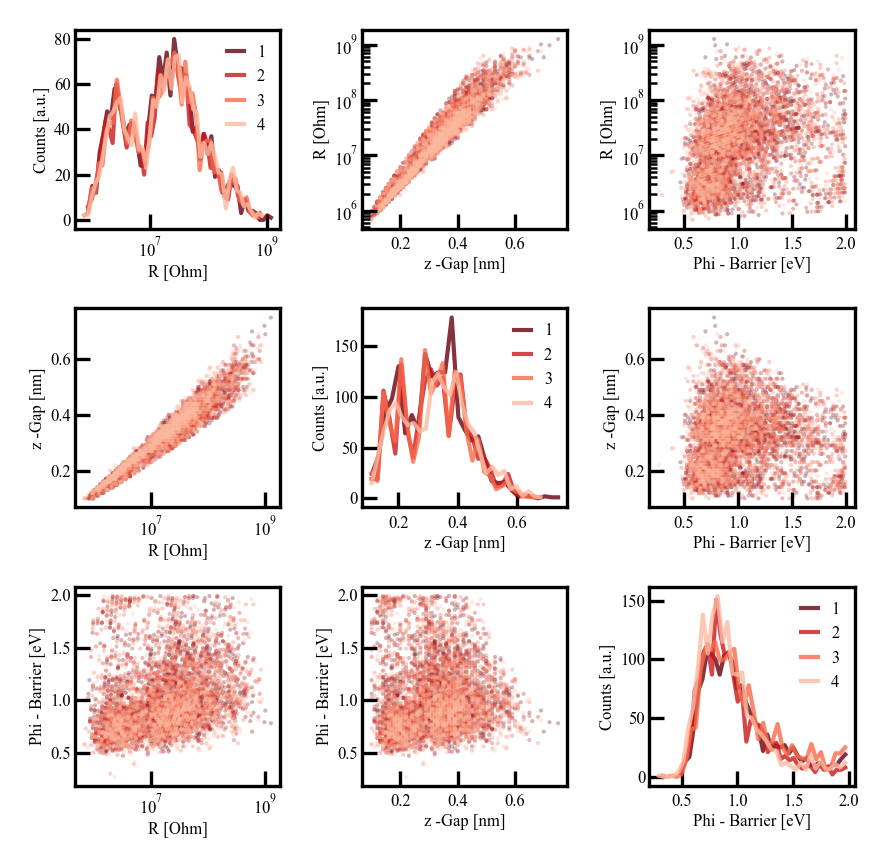

In [529]:
axs = scatter_plot_matrix(data=tunnel_pull_fits, col_names=('R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]'), set_log=(True, False, False), hue='IV part',
                          figsize=None, dpi=300, s=1, edgecolor='None', alpha=0.3, bins_num=(50, 30, 40), cmap_reversed=True)

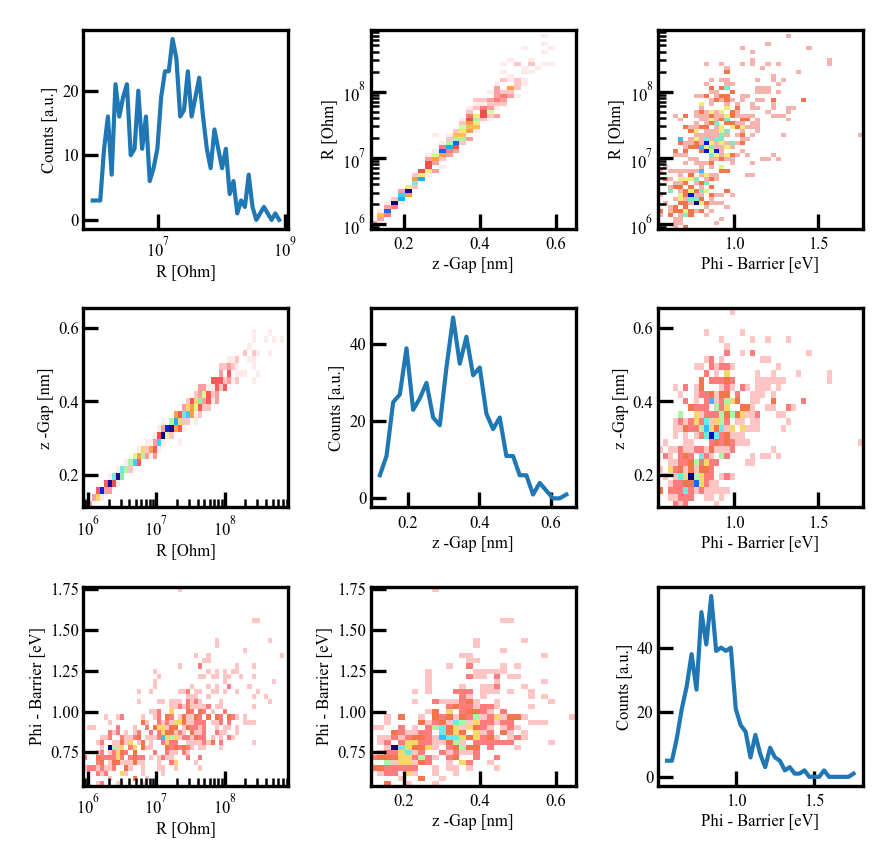

In [511]:
select_columns = ('R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]')

axs =  hist_2d_plot_matrix(data = tunnel_pull_fits_filt.groupby('Trace').mean(), col_names=select_columns,
                           set_log=(True, False, False), dpi=300, bins_num=(50, 30, 40))